In [1]:
import dask_awkward as dak
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from distributed import LocalCluster, Client, progress

client = Client(n_workers=60,  threads_per_worker=1, processes=True, memory_limit='10 GiB')

# sample = "vbf_powheg"
# sample = "ggh_powheg"
sample = "dy_M-100To200"
# sample = "data_A"
# sample = "data_D"
# full_load_path = load_path+f"/{sample}/*/*.parquet"
# full_load_path = load_path+f"/{sample}/0/*.parquet"
full_load_path = f"/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/*.parquet"
# full_load_path = f"/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/*/*.parquet"
# full_load_path = f"/depot/cms/users/yun79/results/stage1/test_validation_bigV2_19April2024/2018/f1_0/{sample}/*/*.parquet"
# full_load_path = f"/depot/cms/users/yun79/results/stage1/test_fullVsRun3/2018/f1_0/{sample}/0/*.parquet"
# full_load_path = f"/depot/cms/users/yun79/results/stage1/test_validation_bigV2_12April2024/2018/f1_0/{sample}/*/*.parquet"

df_new = dak.from_parquet(full_load_path) 
# region_cut = (df_new.h_peak | df_new.h_sidebands)
# df_new = df_new[region_cut]

In [2]:
! ls /depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/

part0000.parquet  part0552.parquet  part1104.parquet  part1656.parquet
part0001.parquet  part0553.parquet  part1105.parquet  part1657.parquet
part0002.parquet  part0554.parquet  part1106.parquet  part1658.parquet
part0003.parquet  part0555.parquet  part1107.parquet  part1659.parquet
part0004.parquet  part0556.parquet  part1108.parquet  part1660.parquet
part0005.parquet  part0557.parquet  part1109.parquet  part1661.parquet
part0006.parquet  part0558.parquet  part1110.parquet  part1662.parquet
part0007.parquet  part0559.parquet  part1111.parquet  part1663.parquet
part0008.parquet  part0560.parquet  part1112.parquet  part1664.parquet
part0009.parquet  part0561.parquet  part1113.parquet  part1665.parquet
part0010.parquet  part0562.parquet  part1114.parquet  part1666.parquet
part0011.parquet  part0563.parquet  part1115.parquet  part1667.parquet
part0012.parquet  part0564.parquet  part1116.parquet  part1668.parquet
part0013.parquet  part0565.parquet  part1117.parquet  part1669.parquet
part00

In [3]:
! ls /depot/cms/users/yun79/hmm/copperheadV1clean/test_validation/stage1_output/2018/{sample}/

0014ea8a6fcfa5dbc9c475bacc28d8f0.parquet
00402616cec018ffb93d177569876e89.parquet
004a86e2e01f0b5ffd02f8a2cd865ff5.parquet
0052bf01d2acc8c3d5c6c30acb350236.parquet
0074caa89c4de9f07826c7e52d717b9b.parquet
00a247f4420fffa0a49525ebcf7d9974.parquet
00b772542187f52eb92b3970edfdc345.parquet
00f0cda1ca8aa813e5e911c510f57a9b.parquet
010865fbc82d92cffb57c172219380b5.parquet
012712877d014900584ae1f107976f95.parquet
012dde12cef44dba88b7206d0768d8ed.parquet
0136561ad6f26a663b54fe5967e5c584.parquet
014c7182adc455794a0401250e4d8915.parquet
014fb2fde5f8f964e4562fe4ac504158.parquet
015ed295cc70b331a7c3873a445f84c9.parquet
01760453ac22eae5ab33800a5279236f.parquet
01845c8f6d89379df4d47fa5fec8de67.parquet
0184fd3fdc4b51ed9cd771fbfd158e7f.parquet
019c2213b8001ea5fefe8db672c9233f.parquet
01c52e8ea54f94833c6964152c2f4644.parquet
01dce63762e78456980bea69775f94d1.parquet
01f1550abaa454cb0b4cd04fdebbedc5.parquet
0238364813840a5ec5e56a3a6e45b262.parquet
023cb17b619b568d813a64d1ab3ba175.parquet
027985215383ecf5

In [2]:
full_load_path = f"/depot/cms/users/yun79/hmm/copperheadV1clean/test_validation/stage1_output/2018/{sample}/*.parquet"
# full_load_path = f"/depot/cms/hmm/vscheure/onefiletest/stage1_output/2018/{sample}/*.parquet"
# full_load_path = f"/depot/cms/users/yun79/hmm/copperheadV1clean/test_validation_bigV1_12April2024_w_HEMVeto/stage1_output/2018/{sample}/*.parquet"


import dask.dataframe as dd
import pandas as pd
# df = dd.from_pandas(pd.DataFrame(), npartitions=1)
df_old = dd.read_parquet(full_load_path)
# region = df_old.region.compute()

In [3]:
region = df_new.h_sidebands | df_new.h_peak | df_new.z_peak
weights_new = df_new["weights"]
weights_new = weights_new[region].compute()
# weights_new = df_new["weights"].compute()
# if "ggh" in sample:
#     print("ggh in sample!")
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts

#-------------------------------------------------------------------------
print(f"weights_new: {ak.to_numpy(weights_new)}")
print(ak.num(weights_new, axis=0))
# weights_old = df_old["wgt_nominal"].compute()
region = df_old.region 
# print(region.compute())
# print((region =="z-peak").compute())
region = (region =="z-peak") | (region =="h-peak") | (region =="h-sidebands")
weights_old = df_old["wgt_nominal"][region].compute()
print(f"weights_old: {weights_old}")
print(weights_old.shape)
print(f"weights_old non zero: {weights_old[weights_old!=0].shape}")
weights_new_np = ak.to_numpy(weights_new)
print(f"weights_new non zero: {weights_new_np[weights_new_np!=0].shape}")

# print(max(weights_new))
# print(min(weights_new))
# print(max(weights_old))
# print(min(weights_old))
# print(max(abs(weights_new[:]-weights_old)/weights_old))
# print(np.mean(abs(weights_new[:]-weights_old)))
# print(np.median(abs(weights_new[:]-weights_old)))


# print(max(abs(weights_new[:-3]-weights_old)/weights_old))
# print(np.mean(abs(weights_new[:-3]-weights_old)/weights_old))
# print(np.median(abs(weights_new[:-3]-weights_old)/weights_old))
# print(max(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(np.mean(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(np.median(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(max(abs(weights_new-weights_old)/weights_old))
# print(np.mean(abs(weights_new-weights_old)/weights_old))

weights_new: [ 0.16118429  0.12357223  0.11780671 ...  0.09458025  0.11099753
 -0.08228338]
23718823
weights_old: entry
4        0.206085
34       0.081369
41      -0.100198
62      -0.086319
68       0.111942
           ...   
99481    0.117850
99487   -0.090729
99492    0.101488
99504    0.120153
99514    0.122850
Name: wgt_nominal, Length: 23718839, dtype: float64
(23718839,)
weights_old non zero: (23718839,)
weights_new non zero: (23718823,)


In [4]:
binning_map = {
    "pt" : [25, 300, 50],
    "eta" : [-5, 5, 30],
    "phi" : [-3.1415, 3.1415, 101],
    "mass" : [0, 150, 100],
}

weights_old non zero: (692383,)
weights_new non zero: (692384,)


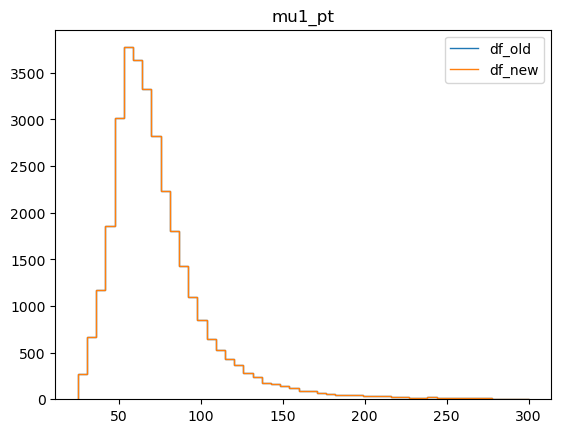

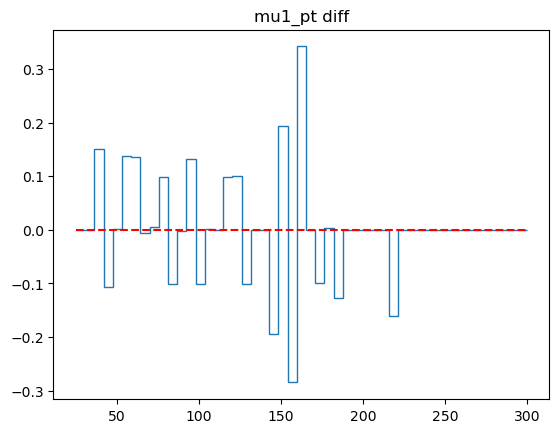

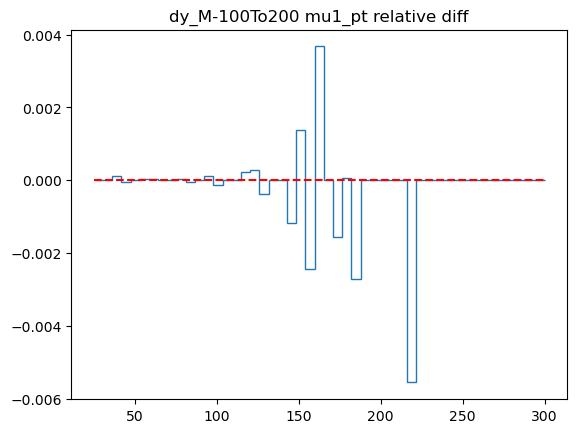

weights_old non zero: (692383,)
weights_new non zero: (692384,)


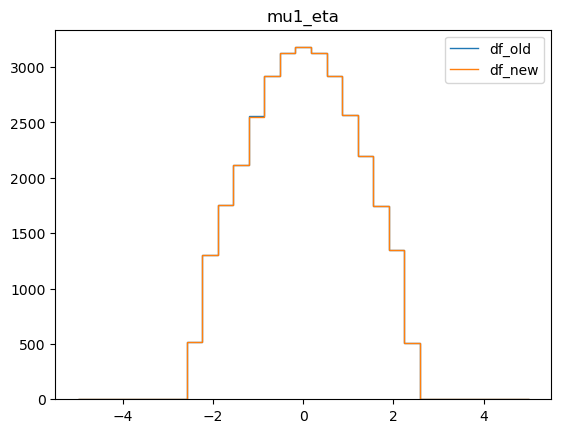

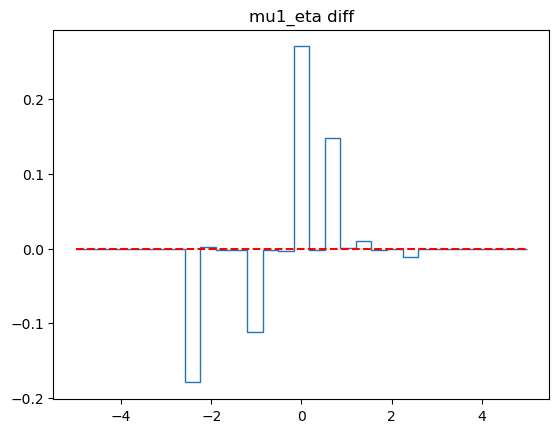

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


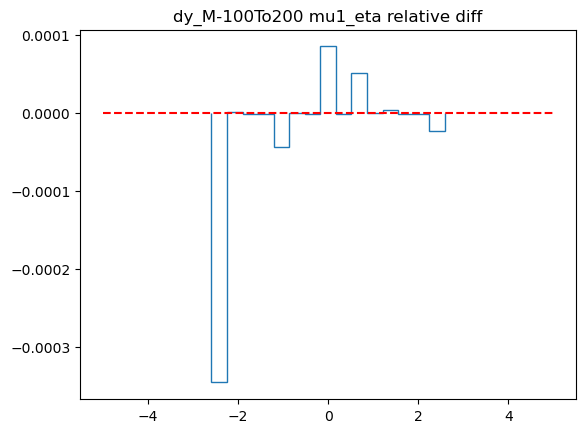

weights_old non zero: (692383,)
weights_new non zero: (692384,)


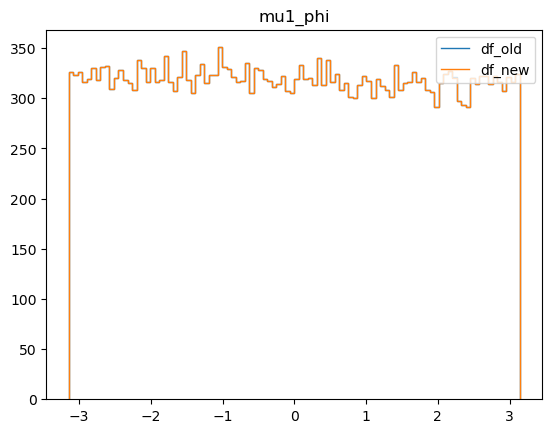

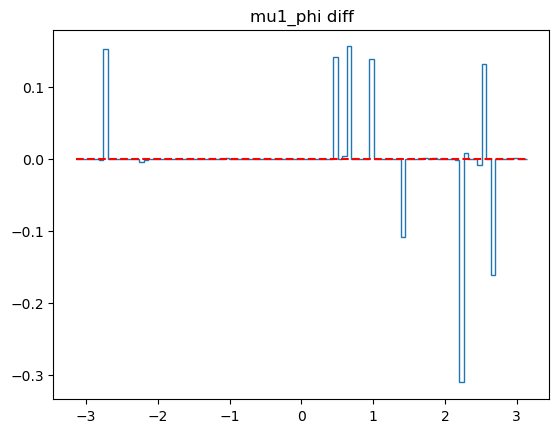

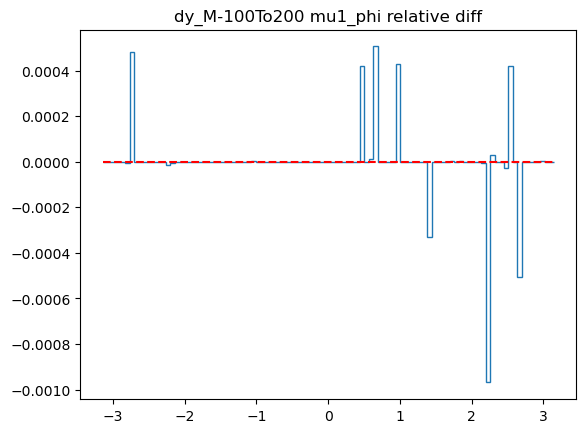

weights_old non zero: (692383,)
weights_new non zero: (692384,)


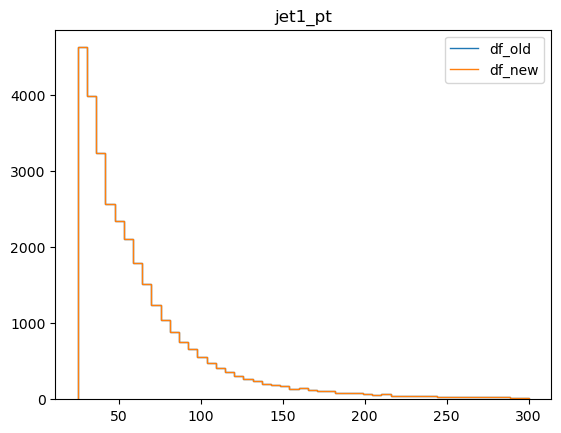

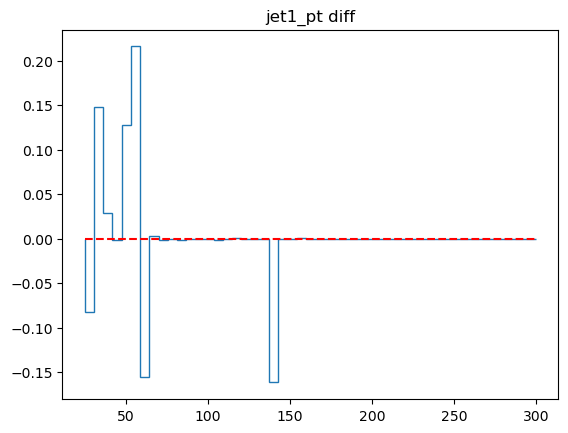

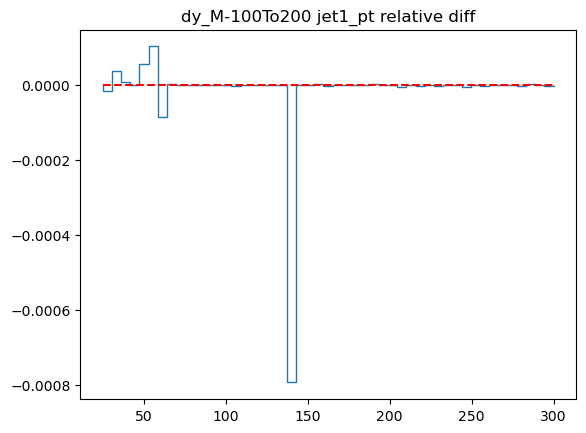

weights_old non zero: (692383,)
weights_new non zero: (692384,)


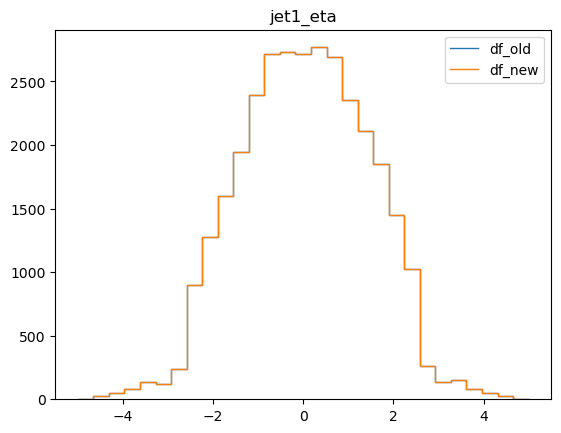

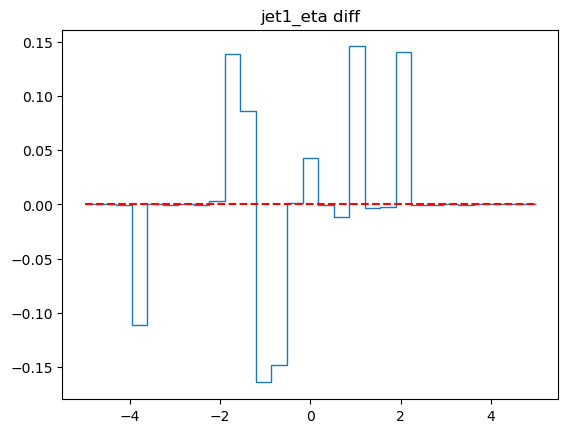

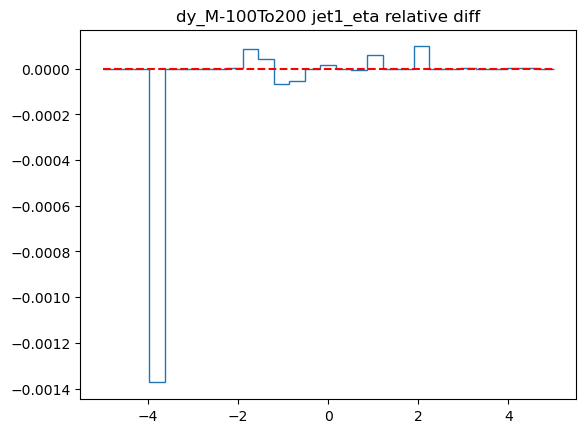

weights_old non zero: (692383,)
weights_new non zero: (692384,)


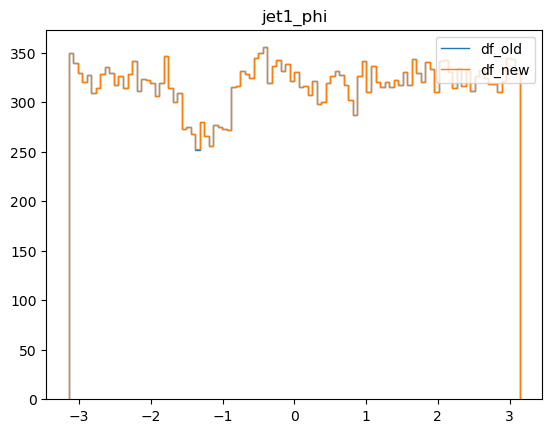

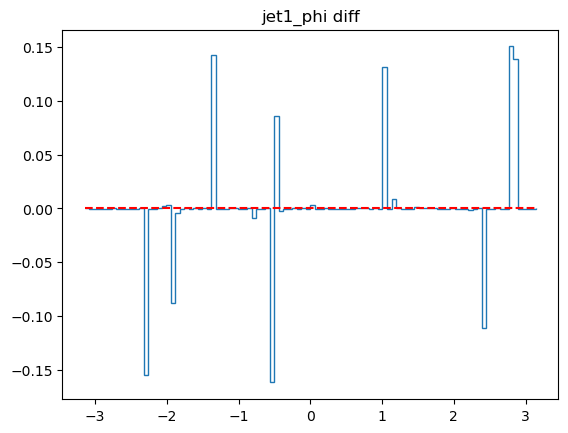

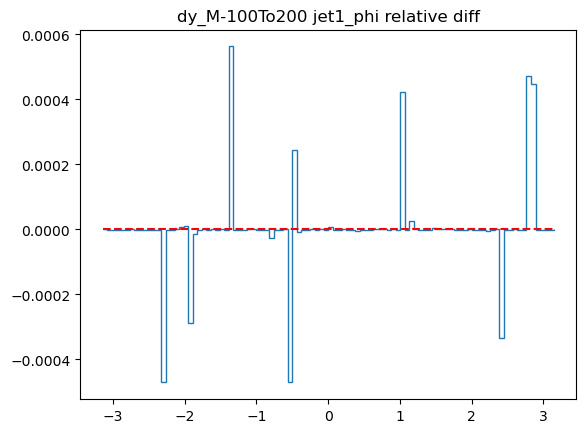

In [5]:
# var = "mu1_pt"
# var = "dimuon_mass"
# var = "jet1_pt"
# variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
variables = ["mu1_pt","mu1_eta", "mu1_phi", 
             # "jet1_mass", 
             "jet1_pt", "jet1_eta", "jet1_phi"
            ]
btag_cut_old =(df_old.nBtagLoose_nominal >= 2) | (df_old.nBtagMedium_nominal >= 1)
vbf_cut = (df_old.jj_mass_nominal > 400) & (df_old.jj_dEta_nominal > 2.5) & (df_old.jet1_pt_nominal > 35)
vbf_cut.fillna(False)
weights_old = (df_old["wgt_nominal"]
              # * (~df_old["vbf_cut_nominal"])
               * ~vbf_cut
              * btag_cut_old
              ).compute()


# weights_new = ak.to_numpy(df_new["weights"].compute())
region = df_new.h_sidebands | df_new.h_peak | df_new.z_peak
weights_new = df_new["weights"]
btag_cut_new =(df_new["nBtagLoose"] >= 2) | (df_new["nBtagMedium"] >= 1)
weights_new = (weights_new*region * (~df_new["vbf_cut"]) * btag_cut_new).compute()

for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
    # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
    # new_weights = np.ones(new_len)
    # new_weights = new_weights*old_len/new_len
    if "jet" in var:
        var_old = var+ "_nominal"
    else: 
        var_old = var
    hist_old, edges = np.histogram(df_old[var_old].compute(), bins=binning ,weights=weights_old)
    # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
    # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
    print(f"weights_old non zero: {weights_old[weights_old!=0].shape}")
    weights_new = ak.to_numpy(weights_new)
    print(f"weights_new non zero: {weights_new[weights_new!=0].shape}")
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()
    plt.stairs((hist_new-hist_old)/hist_old, edges)
    plt.title(f"{sample} {var}"+" relative diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()

weights_old non zero: (692383,)
weights_new non zero: (692384,)


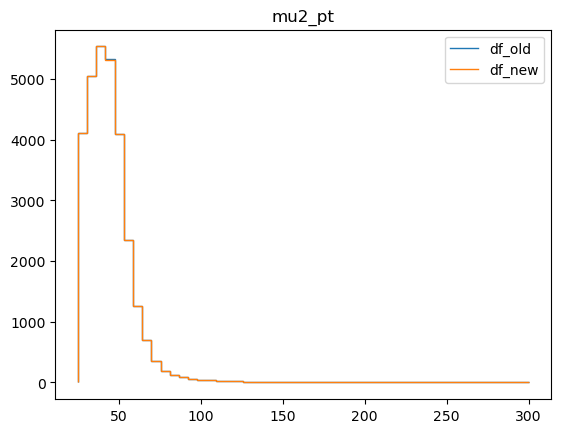

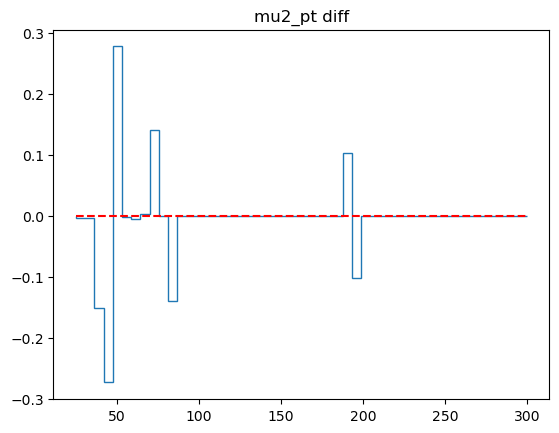

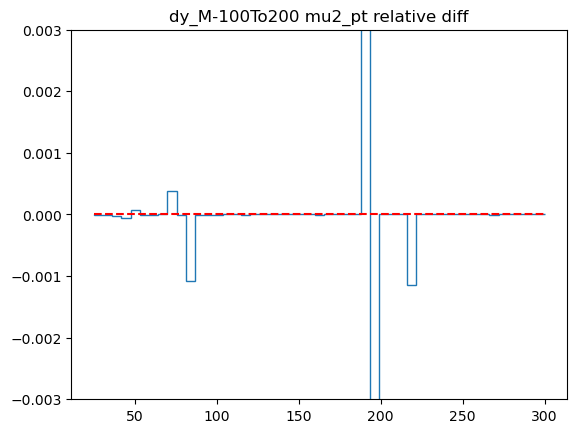

weights_old non zero: (692383,)
weights_new non zero: (692384,)


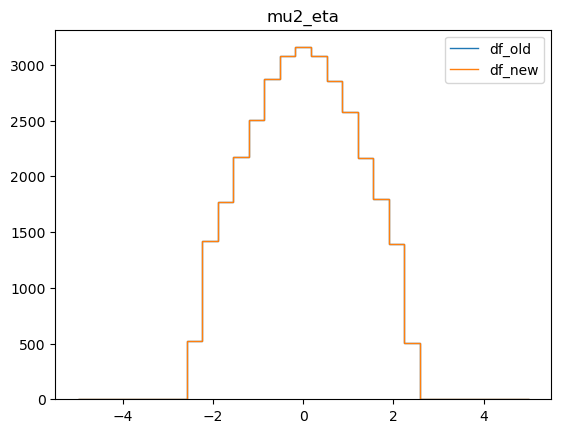

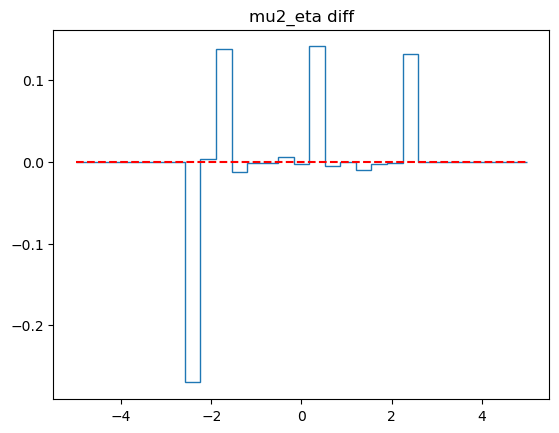

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


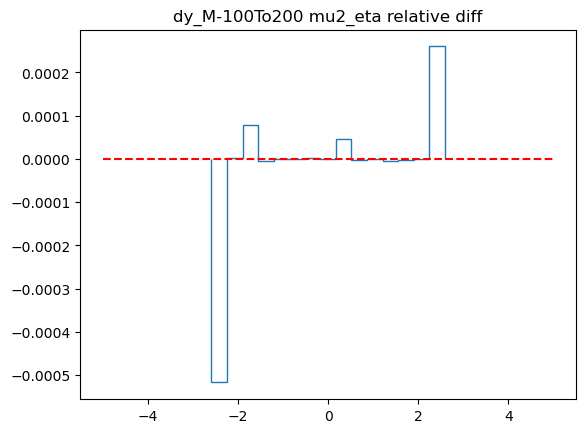

weights_old non zero: (692383,)
weights_new non zero: (692384,)


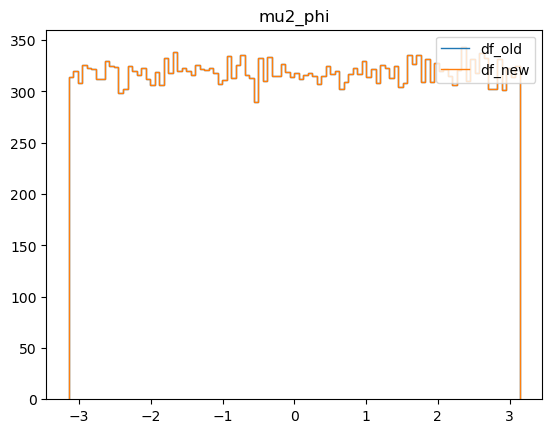

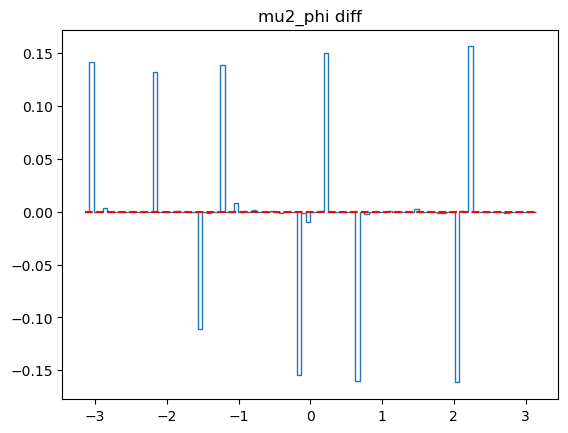

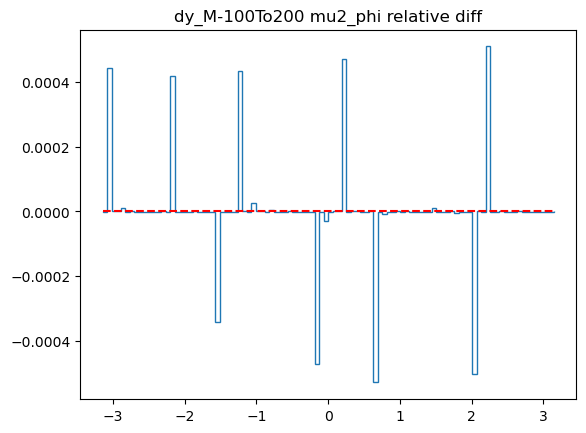

weights_old non zero: (692383,)
weights_new non zero: (692384,)


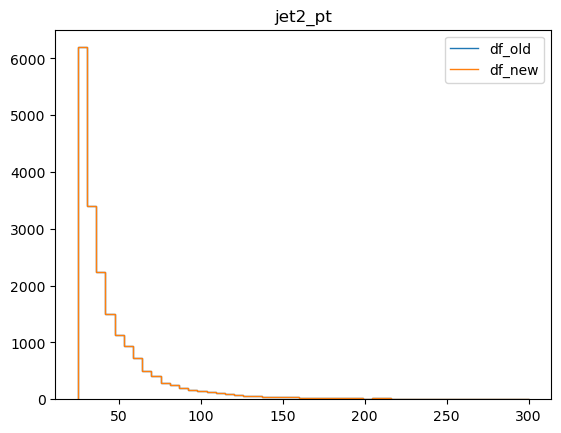

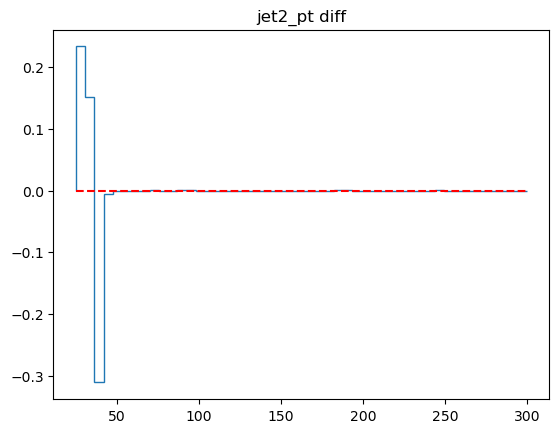

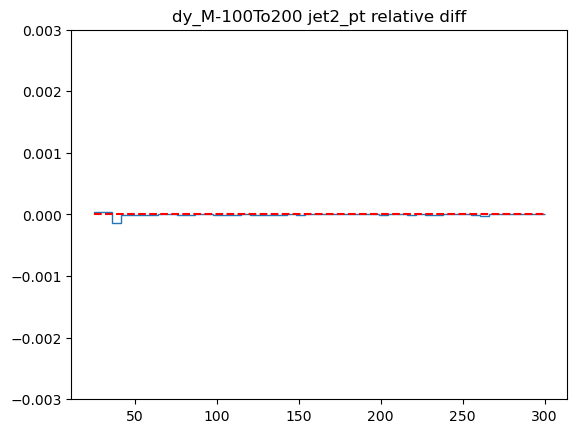

weights_old non zero: (692383,)
weights_new non zero: (692384,)


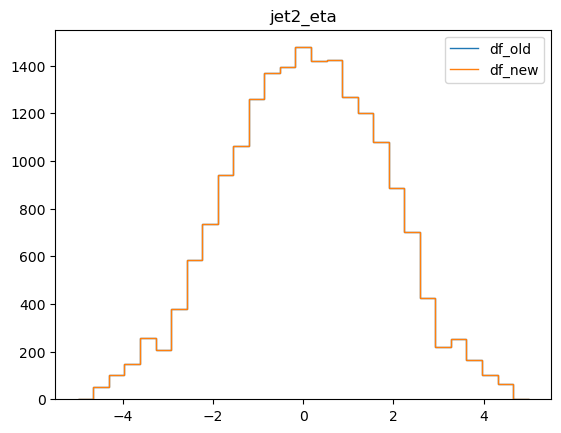

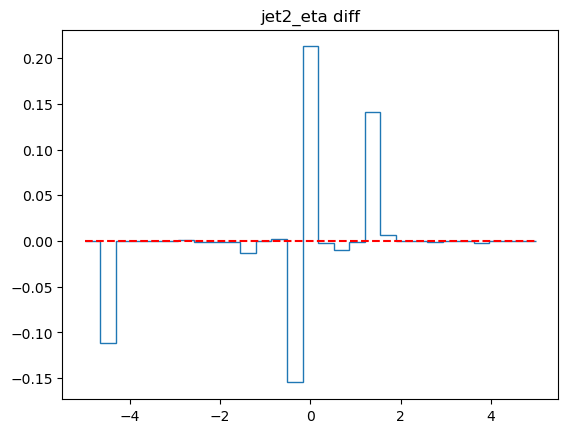

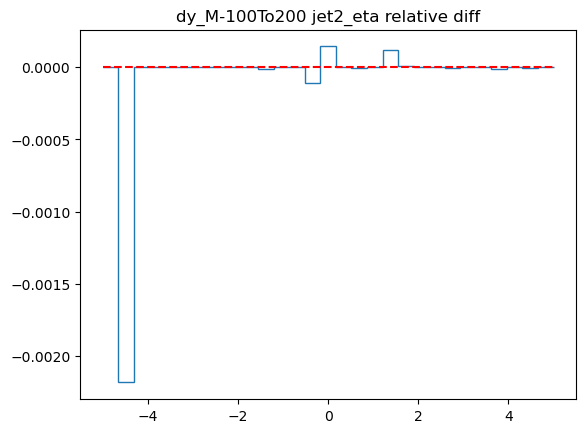

weights_old non zero: (692383,)
weights_new non zero: (692384,)


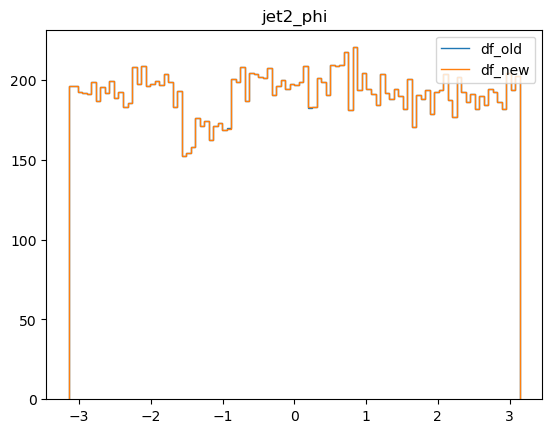

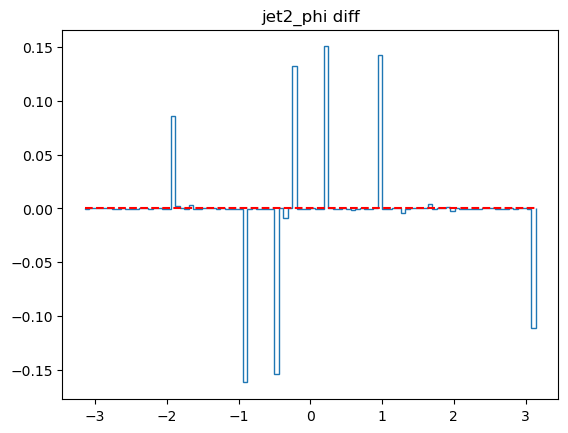

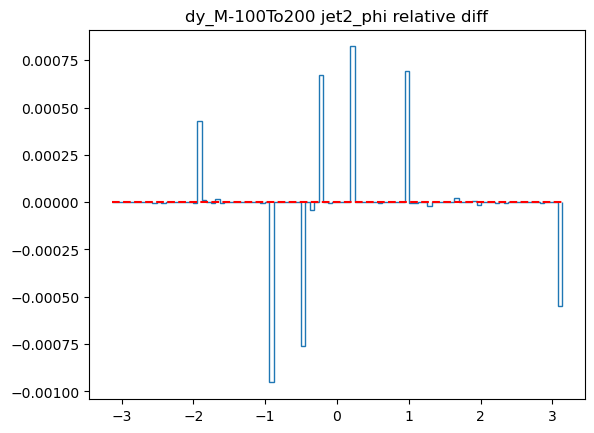

In [6]:
"""
For mu2, special condition is needed bc when there's only one muon, mu2==mu1 in copperhead
"""
# var = "mu1_pt"
# var = "dimuon_mass"
# var = "jet1_pt"
# variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
variables = ["mu2_pt","mu2_eta", "mu2_phi", 
             # "jet2_mass", 
             "jet2_pt", "jet2_eta", "jet2_phi",
            ]
btag_cut_old =(df_old.nBtagLoose_nominal >= 2) | (df_old.nBtagMedium_nominal >= 1)
vbf_cut = (df_old.jj_mass_nominal > 400) & (df_old.jj_dEta_nominal > 2.5) & (df_old.jet1_pt_nominal > 35)
vbf_cut.fillna(False)
weights_old = (df_old["wgt_nominal"]
              # * (~df_old["vbf_cut_nominal"])
               * ~vbf_cut
              * btag_cut_old
              ).compute()



# weights_new = ak.to_numpy(df_new["weights"].compute())
region = df_new.h_sidebands | df_new.h_peak | df_new.z_peak
weights_new = df_new["weights"]
btag_cut_new =(df_new["nBtagLoose"] >= 2) | (df_new["nBtagMedium"] >= 1)
weights_new = (weights_new*region * (~df_new["vbf_cut"]) * btag_cut_new).compute()

for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # the way copperheadV1 defines mu2 is the muon with the lowest pt, thus the
    # only way to make copperheadV1 and copperheadV2 same is to ensure nmuons ==2
    # if 'mu' in var:
    #     nvars_new = df_new["nmuons"].compute()
    #     nvars_old = df_old["nmuons"].compute()
    # else:
    #     nvars_new = df_new["njets"].compute()
    #     nvars_old = df_old["njets"].compute()
    # hist_old, edges = np.histogram(df_old[nvars_old ==2][var].compute(), bins=binning , weights=weights_old[nvars_old ==2])
    # hist_new, _= np.histogram(df_new[nvars_new ==2][var].compute(), bins=binning , weights=weights_new[nvars_new ==2])
    if "jet" in var:
        var_old = var+ "_nominal"
    elif "nBtag" in var:
        var_old = var+ "_nominal"
    else: 
        var_old = var
    hist_old, edges = np.histogram(df_old[var_old].compute(), bins=binning , weights=weights_old)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning , weights=weights_new)
    
    print(f"weights_old non zero: {weights_old[weights_old!=0].shape}")
    weights_new = ak.to_numpy(weights_new)
    print(f"weights_new non zero: {weights_new[weights_new!=0].shape}")
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()
    plt.stairs((hist_new-hist_old)/hist_old, edges)
    if "pt" in var:
        plt.ylim(-0.003, 0.003)
    plt.title(f"{sample} {var}"+" relative diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()

In [ ]:
"""
plot nBtags
"""
variables = [
             "nBtagMedium", "nBtagLoose",
            ]
# weights_old = df_old["weights"].compute()
vbf_cut = (df_old.jj_mass_nominal > 400) & (df_old.jj_dEta_nominal > 2.5) & (df_old.jet1_pt_nominal > 35)
vbf_cut.fillna(False)
weights_old = (df_old["wgt_nominal"]
              # * (~df_old["vbf_cut_nominal"])
               * ~vbf_cut
              ).compute()


# weights_new = ak.to_numpy(df_new["weights"].compute())
region = df_new.h_sidebands | df_new.h_peak | df_new.z_peak
weights_new = df_new["weights"]
weights_new = (weights_new*region * (~df_new["vbf_cut"])).compute()
# if "ggh" in sample:
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts
# print("adding qgl wgts!")
# qgl_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/*/qgl/wgt.parquet'
# qgl_wgts = ak.from_parquet(qgl_full_load_path)["qgl_nom"]
# print(f"qgl_wgts: {qgl_wgts}")
# weights_new = weights_new*qgl_wgts
#--------------------------------------------------- 
for var in variables:
    kin = var.split("_")[-1]
    binning = np.linspace(*[0, 4, 5])
    # the way copperheadV1 defines mu2 is the muon with the lowest pt, thus the
    # only way to make copperheadV1 and copperheadV2 same is to ensure nmuons ==2
    # if 'mu' in var:
    #     nvars_new = df_new["nmuons"].compute()
    #     nvars_old = df_old["nmuons"].compute()
    # else:
    #     nvars_new = df_new["njets"].compute()
    #     nvars_old = df_old["njets"].compute()
    # hist_old, edges = np.histogram(df_old[nvars_old ==2][var].compute(), bins=binning , weights=weights_old[nvars_old ==2])
    # hist_new, _= np.histogram(df_new[nvars_new ==2][var].compute(), bins=binning , weights=weights_new[nvars_new ==2])
    if "nBtag" in var:
        var_old = var+ "_nominal"
    else: 
        var_old = var
    hist_old, edges = np.histogram(df_old[var_old].compute(), bins=binning , weights=weights_old)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning , weights=weights_new)
    
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()
    plt.stairs((hist_new-hist_old)/hist_old, edges)
    if "pt" in var:
        plt.ylim(-0.003, 0.003)
    plt.title(f"{sample} {var}"+" relative diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()

In [10]:
# """
# fsr version
# """
# variables = ["mu1_pt","mu1_eta", "mu1_phi", 
#              "jet1_mass", "jet1_pt", "jet1_eta", "jet1_phi"
#             ]
# fsr_mask_old = df_old["fsr_mask"].compute()
# fsr_mask_new = df_new["fsr_mask"].compute()
# weights_old = df_old["weights"].compute()[fsr_mask_old]
# weights_new = ak.to_numpy(df_new["weights"].compute())[fsr_mask_new]
# df_old = df_old[fsr_mask_old]
# df_new = df_new[fsr_mask_new]

# for var in variables:
#     kin = var.split("_")[-1]
#     # binning = np.linspace(*[25, 300, 50])
#     binning = np.linspace(*binning_map[kin])
#     # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
#     # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
#     # new_weights = np.ones(new_len)
#     # new_weights = new_weights*old_len/new_len
#     hist_old, edges = np.histogram(df_old[var].compute(), bins=binning ,weights=weights_old)
#     # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
#     # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
#     hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
#     plt.stairs(hist_old, edges, label = "df_old")
#     plt.stairs(hist_new, edges, label = "df_new")
#     plt.legend(loc="upper right")
#     plt.title(var)
#     plt.show()
#     plt.stairs((hist_new-hist_old), edges)
#     plt.title(var+" diff")
#     plt.show()

In [11]:
# """
# fsr version for mu2, fsr_mask is already applied, so we don't change anything
# """
# # var = "mu1_pt"
# # var = "dimuon_mass"
# # var = "jet1_pt"
# # variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
# variables = ["mu2_pt","mu2_eta", "mu2_phi", 
#              "jet2_mass", "jet2_pt", "jet2_eta", "jet2_phi"
#             ]
# weights_old = df_old["weights"].compute()
# weights_new = ak.to_numpy(df_new["weights"].compute())
# for var in variables:
#     kin = var.split("_")[-1]
#     # binning = np.linspace(*[25, 300, 50])
#     binning = np.linspace(*binning_map[kin])
#     # the way copperheadV1 defines mu2 is the muon with the lowest pt, thus the
#     # only way to make copperheadV1 and copperheadV2 same is to ensure nmuons ==2
#     if 'mu' in var:
#         nvars_new = df_new["nmuons"].compute()
#         nvars_old = df_old["nmuons"].compute()
#     else:
#         nvars_new = df_new["njets"].compute()
#         nvars_old = df_old["njets"].compute()
#     hist_old, edges = np.histogram(df_old[nvars_old ==2][var].compute(), bins=binning , weights=weights_old[nvars_old ==2])
#     hist_new, _= np.histogram(df_new[nvars_new ==2][var].compute(), bins=binning , weights=weights_new[nvars_new ==2])
    
#     plt.stairs(hist_old, edges, label = "df_old")
#     plt.stairs(hist_new, edges, label = "df_new")
#     plt.legend(loc="upper right")
#     plt.title(var)
#     plt.show()
#     plt.stairs((hist_new-hist_old), edges)
#     plt.title(var+" diff")
#     plt.show()

In [70]:
# sum(df_old["mu1_pt"] ==np.nan)
fsr_mu1_pt_old = df_old["mu1_pt"].compute()
fsr_mu1_pt_new =  df_new["mu1_pt"].compute()
print(fsr_mu1_pt_old[fsr_mu1_pt_old != fsr_mu1_pt_new])
print(fsr_mu1_pt_new[fsr_mu1_pt_old != fsr_mu1_pt_new])
# df_old[]

entry
393      63.289581
669      63.089520
1550     45.827698
2286    110.583145
4710     61.832088
6403    166.207367
6643     44.467964
7378     59.695114
8396     80.743317
Name: mu1_pt, dtype: float32
[59.3, 62.4, 41.3, 80.7, 50.2, 156, 37.7, 48.8, 73.7]


In [20]:
nvars_new = df_new["jet1_mass"].compute()
nvars_old = df_old["jet1_mass"].compute()
# nvars_old
np.max(nvars_new)

141.125

In [21]:
diff = hist_old-hist_new
len(diff[diff !=0])

0

In [ ]:
# df_old.fields
# df_old["mu1_pt"].compute()
# df_old["region"].compute()
# df_old["wgt_nominal"].compute()


In [43]:
# (df_old).fields
regions = df_old.region.compute() 

In [59]:
# import dask.dataframe as dd
# import pandas as pd
# # df = dd.from_pandas(pd.DataFrame(), npartitions=1)
# df = dd.read_parquet(full_load_path)
# region = df.region.compute()

In [55]:
region== "h-peak"

entry
3067      True
4094     False
4405      True
6031     False
6797      True
         ...  
90309    False
90479    False
92886     True
94390    False
95004     True
Name: region, Length: 89712, dtype: bool[pyarrow]

In [60]:
region

entry
3067          h-peak
4094     h-sidebands
4405          h-peak
6031     h-sidebands
6797          h-peak
            ...     
90309    h-sidebands
90479    h-sidebands
92886         h-peak
94390    h-sidebands
95004         h-peak
Name: region, Length: 89712, dtype: string

In [8]:
A = np.ones(2, dtype="float32")
A.dtype

dtype('float32')

In [10]:
type(sum(A))

numpy.float64

In [12]:
type(np.sum(A))

numpy.float32

In [57]:
np.sqrt(-ak.from_numpy(np.ones(2)))

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in sqrt
  return impl(*broadcasted_args, **(kwargs or {}))


<Array [nan, nan] type='2 * float64'>